# Project: Investigate TMDb movie database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I will be analyze and investigate The Movies database , I will focus on the common characteristics of the highest-grossing films, , also the rates , are they affect on revenue or not and  Over the years, has the type of most watched movies changed? And Relying on that, does production companies Kept up with the change.

In [1]:
#calling important packges that I will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In the next cells I will loade the tmdb-movies data that I will analyze in this project

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## column discription and information

In [3]:
#Information for every column in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.shape

(10866, 21)

In [5]:
df.duplicated().sum()

1

In [6]:
#change data type for release_date to date time
df["release_date"] = pd.to_datetime(df["release_date"])

In [7]:
# replace all zero valuse with nan to drop all NAN value
df.replace(0, np.nan,inplace= True)

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### from the previous cell it seems there is dome columns had a NAN value also thier is extra columns, so I will cleaning the data by removing all unnecessary data

# Data Cleaning (Removing unnecessary data by drop some columns, duplicated values and NAN values)

In [9]:
#drop unnecessary columns
df.drop(['id','imdb_id','homepage','keywords','overview','tagline'],axis=1 ,inplace = True) 

In [10]:
#drop duplicated rows 
df.drop_duplicates(inplace = True)

In [11]:
#drop all NAN values
df.dropna(inplace = True)

## show data after cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(5)
memory usage: 475.6+ KB


In [13]:
df.shape

(3805, 15)

In [14]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


#### showing a histogram for the  data  after cleaning

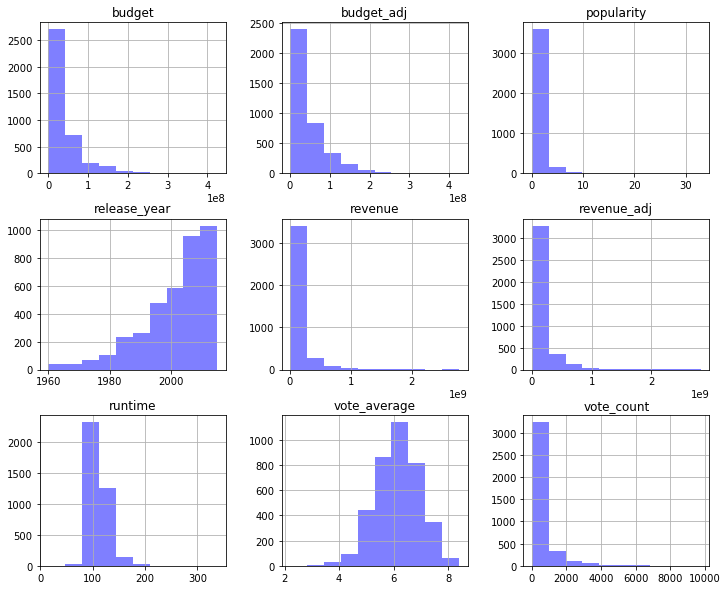

In [15]:
#histogram for all numerical data
df.hist(figsize =(12,10), color = 'blue', alpha = 0.5);

<a id='eda'></a>
## Exploratory Data Analysis

> In this section I will choose a revenue as a dependent variable and other variables as an independent
also I will answer some question


### Research Question 1
#### Does revenue over years increase or decrease?
##### -revenues & release_year

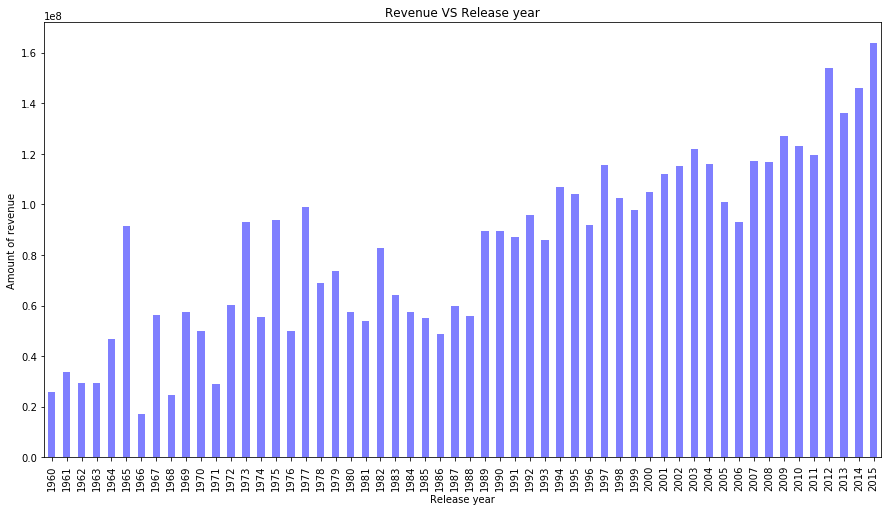

In [16]:
#using groupby method to show amount of revenue over yeaers 
df.groupby('release_year').revenue.mean().plot(kind = 'bar', figsize= (15,8),alpha = 0.5, color ='blue');
plt.xlabel('Release year')
plt.ylabel('Amount of revenue')
plt.title('Revenue VS Release year');

### Result 
##### 2015 it was the year with highest revenue over this years and as genral the revenue of this movies is increase over the years

### Research Question 2
#### Is the higher the budget, the higher the revenues?
##### -revenues & budget

In [17]:
#get median of revenue
df.revenue.median()

46216641.0

In [18]:
#calculate high Revenue and low Revenue by using median of revenue
highRevenue = df.revenue >= 46216641.0
lowRevenue = df.revenue < 46216641.0

In [19]:
df[highRevenue].vote_average.max()

8.3

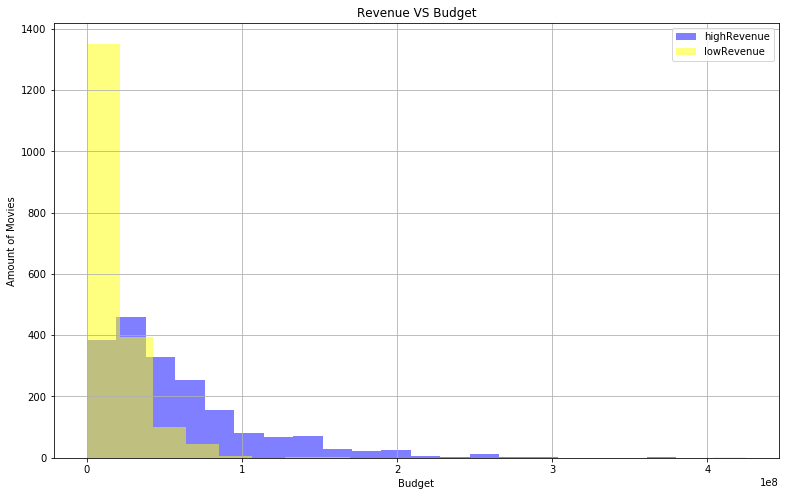

In [20]:
#ploting budget based on high or low revenue
df[highRevenue].budget.hist(figsize = (13,8) ,alpha = 0.5, bins = 20, label = 'highRevenue', color ='blue')
df[lowRevenue].budget.hist(figsize = (13,8) , alpha = 0.5, bins = 20, label = 'lowRevenue', color = 'yellow')
plt.title('Revenue VS Budget')
plt.xlabel('Budget')
plt.ylabel('Amount of Movies')
plt.legend();

### Result
#### It is clear that more budget does not get more revenue 

### Research Question 3
#### Does average vote affect revenue significantly?
##### -revenues & vote_average

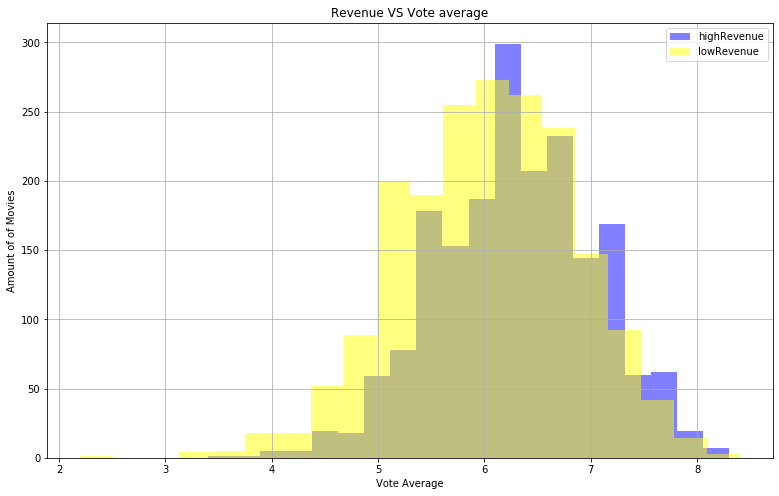

In [21]:
#ploting vote average based on high or low revenue
df[highRevenue].vote_average.hist(figsize = (13,8) ,alpha = 0.5, bins = 20, label = 'highRevenue', color ='blue')
df[lowRevenue].vote_average.hist(figsize = (13,8) , alpha = 0.5, bins = 20, label = 'lowRevenue', color = 'yellow')
plt.title('Revenue VS Vote average')
plt.xlabel('Vote Average')
plt.ylabel('Amount of of Movies')
plt.legend();

### Result

##### The difference between high and low revenue movies in vote average is small, so their is an effect but is small

### Research Question 4 
#### Which genres are most popular? 

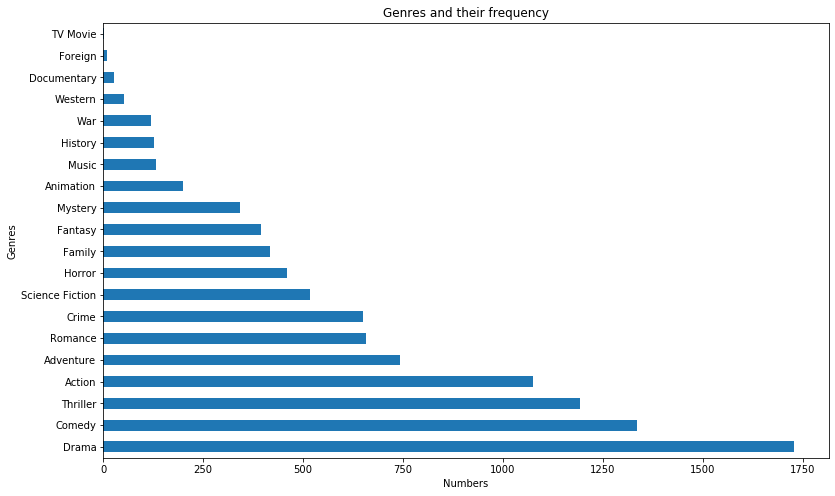

In [22]:
#split generse in every value to count number of geners in every row 
genresCount = pd.Series(df["genres"].str.cat(sep = '|').split('|')).value_counts(ascending= False)
genresCount.plot(kind = 'barh', figsize= (13,8))
plt.title('Genres and their frequency');
plt.xlabel('Numbers')
plt.ylabel('Genres');

### Result 
#### From the prevuest bar char we can see Drama is the most popular generes then Comedy and thriller, and tTV Movie have less popularity

### Research Question 5
#### What is the runtime of the movies with high rating? 

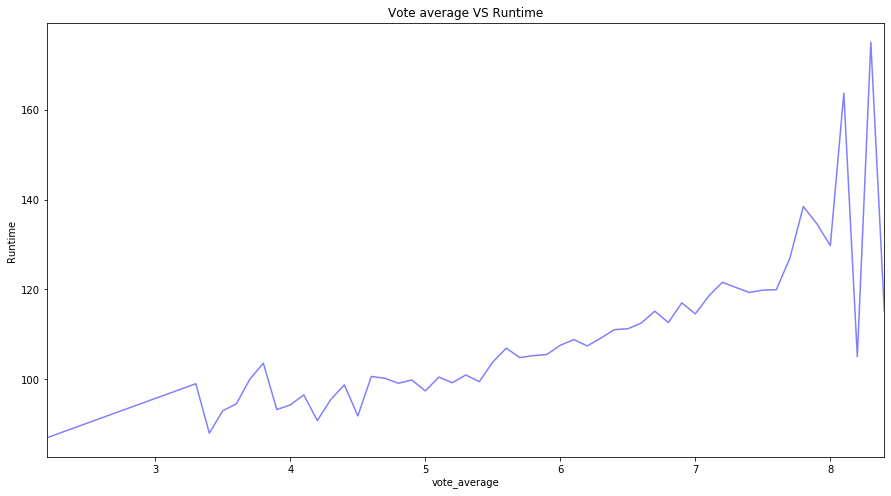

In [23]:
#using groupby method to get the mean of movies runtime depend on vote average
df.groupby('vote_average').runtime.mean().plot(kind = 'line', figsize= (15,8),alpha = 0.5, color ='blue');
plt.ylabel('Runtime');
plt.title('Vote average VS Runtime');

### Result 
#### Most people prefer movies that run between 150-175 min 

<a id='conclusions'></a>
## Conclusions

> TMDb movie data analysis concludes:
- The number of movies increases over the years
- We cannot say that a higher budget can get more revenue
- We can say that avrega voting can affect to get more revenue
- Popular genres over the years are drama
- Less popular genres are TV movies
- Average revenue during these years is 1.089734e + 08
- Average budget during these years 3.760800e + 0

<a id='limitations'></a>
## Limitations
- The data contains some variables that are unnecessary
- Budget and Revenue have a lot of zero values which I dropped it
- Release date datatype was incorrect
- Because of the missing value, the results will not be accurate
- No currency unit for variables (budget, revenue, budget, revenue adjustment)

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295